In [1]:
from src.FunctionsProperties import *
import matplotlib.pyplot as plt

## Create all_files

In [2]:
# Create folders to Results
make_results_folders()
move_to_data()

In [3]:
# ==> READ DOCUMENTATION OF FUNCTION all_properties_file(N,dim, alpha_a, alpha_g) BEFORE RUN THAT CELL!! <==
N = [5000, 10000, 20000, 40000, 80000, 100000, 160000, 320000, 640000]
#N = [5000]
dim = [1, 2, 3, 4]

for n in N:
    for d in dim:
        all_combinations_ag =  extract_alpha_values(n, d)
        for i in range(len(all_combinations_ag)):
            try:
                # READ DOCUMENTATION BEFORE RUN THAT CELL
                all_properties_file(n, d, all_combinations_ag[i][0], all_combinations_ag[i][1])
                fixing_data(n, d, all_combinations_ag[i][0], all_combinations_ag[i][1])
            except FileNotFoundError:
                pass
            #remove_cod_file_column(n, d, all_combinations_ag[i][0], all_combinations_ag[i][1])
clear_output()

In [4]:
N = [5000, 10000, 20000, 40000, 80000, 100000 ,160000, 320000]
dim = [1, 2, 3, 4]
format_file(N, dim)
all_data(N, dim)

5000 1 0.0 5.0
5000 1 7.0 8.0
5000 1 2.0 11.0
5000 1 1.0 0.1
5000 1 21.0 2.0
5000 1 1.0 5.0
5000 1 2.0 10.0
5000 1 8.0 1.0
5000 1 6.0 4.0
5000 1 5.0 3.0
5000 1 32.0 2.0
5000 1 4.0 3.0
5000 1 6.0 0.1
5000 1 7.0 9.0
5000 1 1.0 2.0
5000 1 2.0 6.0
5000 1 0.0 6.0
5000 1 2.5 2.0
5000 1 11.0 2.0
5000 1 4.0 8.0
5000 1 8.0 3.0
5000 1 9.0 7.0
5000 1 8.0 8.0
5000 1 7.0 4.0
5000 1 3.5 2.0
5000 1 16.0 2.0
5000 1 3.0 6.0
5000 1 7.0 6.0
5000 1 4.0 0.0
5000 1 2.0 3.0
5000 1 4.0 1.0
5000 1 2.0 7.0
5000 1 9.0 6.0
5000 1 0.0 3.0
5000 1 28.0 2.0
5000 1 8.5 2.0
5000 1 4.0 7.0
5000 1 1.0 7.0
5000 1 2.0 1.0
5000 1 1.0 6.0
5000 1 3.0 7.0
5000 1 3.0 5.0
5000 1 9.0 0.1
5000 1 5.0 0.1
5000 1 2.0 0.0
5000 1 7.0 3.0
5000 1 5.0 1.0
5000 1 3.0 0.0
5000 1 3.0 8.0
5000 1 8.0 0.1
5000 1 18.0 2.0
5000 1 3.0 9.0
5000 1 4.0 0.1
5000 1 2.0 2.0
5000 1 5.0 6.0
5000 1 5.0 7.0
5000 1 3.0 3.0
5000 1 6.0 5.0
5000 1 6.0 6.0
5000 1 2.0 4.0
5000 1 9.0 1.0
5000 1 0.0 1.0
5000 1 4.0 6.0
5000 1 3.0 2.0
5000 1 2.0 14.0
5000 1 7.0 1.0
5

# <b> Statistical Analysis </b>

### For some reason, for some sets of parameters ($N$, $dim$, $\alpha_a$, $\alpha_g$) , the values ​​of the assortativity coefficients have a large fluctuation (large STD values), generating averages with a considerably large standard error. With this in mind, it is necessary to perform an analysis and filtering on the data whose sets present these problems.

## <b> Using an absolute approach </b>

### Set absolute bounds for the standard error and standard deviation ($\sigma$), regardless of the measurement, and filter out data that exceed these bounds. In my case, i'll use std for other combinations ($\alpha_g$, $\alpha_a$) where the standard error are smaller 10%, when $N$ and $dim$ are equals. The process is very simple. Given the set $R$ $=$ $[-0.0245503$, $-0.0155637$, $-0.0219698$, $-0.0144903$ $,...]$ and a good value for $\sigma$, $\sigma$ $=$ $\sigma_{ideal}$. Each value outside of range $-\sigma_{ideal}$ $<$ $value$ $<$ $\sigma_{ideal}$ or $value < |\sigma_{ideal}|$ is refused.

In [5]:
# Import dataframe with all data
df = pd.read_csv("../../data/all_data.txt", delimiter=" ")
# Filter all data for alpha_a > 1.0
df = df[df["alpha_g"]>=1.0]
# Save new dataframe
df.to_csv("../../data/all_data.txt", index=False, sep=' ')
df.head()

,N,dim,alpha_a,alpha_g,N_samples,short_mean,short_err,short_std,diameter_mean,diameter_err,diameter_std,ass_coeff_mean,ass_coeff_err,ass_coeff_std
0,5000,1,0.0,5.0,51,8.544801,0.081416,0.581428,22.647059,0.216611,1.546913,-0.074047,0.002348,0.016770
1,5000,1,7.0,8.0,51,16.368776,0.239365,1.709409,38.411765,0.745799,5.326073,0.038040,0.001631,0.011645
2,5000,1,2.0,11.0,9768,14.368909,0.014851,1.467744,33.944615,0.037600,3.716081,-0.039045,0.000162,0.015963
4,5000,1,21.0,2.0,101,15.315432,0.104150,1.046700,36.801980,0.407849,4.098829,0.058322,0.001081,0.010868
5,5000,1,1.0,5.0,51,11.146902,0.126884,0.906134,27.549020,0.354593,2.532301,-0.097686,0.003072,0.021942


In [6]:
# Filter N to future linear regression Propetie = Xi_Propertie(dim, alpha_a, alpha_g) * log_10(N) + Chi_Propertie(dim, alpha_a, alpha_g)
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
alpha_filter = [0.0, 1.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
dimensions = [1, 2, 3, 4]

# Filtered dataframe with these sets
f_df = df[
    (df['N'].isin(N)) &
    (df['alpha_a'].isin(alpha_filter)) &
    (df['dim'].isin(dimensions)) &
    (df['alpha_g'] == 2.0)
].sort_values(by=["alpha_a"]).reset_index(drop=True)
f_df

,N,dim,alpha_a,alpha_g,N_samples,short_mean,short_err,short_std,diameter_mean,diameter_err,diameter_std,ass_coeff_mean,ass_coeff_err,ass_coeff_std
0,5000,3,0.0,2.0,1052,8.586792,0.016200,0.525450,22.635932,0.054959,1.782557,-0.075649,0.000501,0.016251
1,320000,3,0.0,2.0,8,12.638725,0.157778,0.446264,35.125000,0.639126,1.807722,-0.018065,0.001296,0.003666
2,80000,3,0.0,2.0,128,11.402827,0.048295,0.546396,31.765625,0.165447,1.871815,-0.031105,0.000706,0.007991
3,5000,1,0.0,2.0,1052,8.583539,0.015994,0.518760,22.595057,0.055319,1.794243,-0.075066,0.000479,0.015540
4,5000,4,0.0,2.0,1052,8.593929,0.016083,0.521638,22.682510,0.056902,1.845600,-0.075923,0.000492,0.015973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,10000,2,15.0,2.0,51,15.841447,0.100122,0.715014,37.901961,0.423112,3.021621,0.027051,0.001207,0.008617
416,5000,3,15.0,2.0,101,13.550015,0.078821,0.792137,32.128713,0.267613,2.689473,0.007534,0.001351,0.013582
417,5000,4,15.0,2.0,101,13.078857,0.080510,0.809114,30.841584,0.266526,2.678554,0.003922,0.001355,0.013615
418,320000,3,15.0,2.0,7,21.316071,0.262507,0.694528,53.285714,0.993174,2.627691,0.019858,0.000693,0.001834


In [7]:
# Starting with empty dictionary
data_percent = {"N": [], "dim": [], "alpha_a": [], "alpha_g": [], "N_samples":[] ,"per_short": 
                [],"std_short":[] ,"per_ass": [],"std_ass":[] ,"per_dia": [], "std_dia":[]}

# Iterate through the rows of the DataFrame
for _, row in f_df.iterrows():
    data_percent["N"].append(row["N"])
    data_percent["dim"].append(row["dim"])
    data_percent["alpha_a"].append(row["alpha_a"])
    data_percent["alpha_g"].append(row["alpha_g"])
    data_percent["N_samples"].append(row["N_samples"])
    
    data_percent["std_short"].append(row["short_std"])
    data_percent["std_ass"].append(row["ass_coeff_std"])
    data_percent["std_dia"].append(row["diameter_std"])
    
    # calculating percentages of each standard error
    per_short = (row["short_err"] / row["short_mean"]) * 100 if row["short_mean"] != 0 else 0
    per_ass = (row["ass_coeff_err"] / abs(row["ass_coeff_mean"])) * 100 if row["ass_coeff_mean"] != 0 else 0
    per_dia = (row["diameter_err"] / row["diameter_mean"]) * 100 if row["diameter_mean"] != 0 else 0
    
    data_percent["per_short"].append(per_short)
    data_percent["per_ass"].append(per_ass)
    data_percent["per_dia"].append(per_dia)

# New dataframe with all percentages to each properties
df_per = pd.DataFrame(data=data_percent)
df_per.to_csv("percent_err.txt", index=False, sep=' ')
df_per.head()

,N,dim,alpha_a,alpha_g,N_samples,per_short,std_short,per_ass,std_ass,per_dia,std_dia
0,5000.0,3.0,0.0,2.0,1052.0,0.188666,0.525450,0.662317,0.016251,0.242794,1.782557
1,320000.0,3.0,0.0,2.0,8.0,1.248372,0.446264,7.173852,0.003666,1.819576,1.807722
2,80000.0,3.0,0.0,2.0,128.0,0.423536,0.546396,2.270606,0.007991,0.520835,1.871815
3,5000.0,1.0,0.0,2.0,1052.0,0.186334,0.518760,0.638278,0.015540,0.244827,1.794243
4,5000.0,4.0,0.0,2.0,1052.0,0.187141,0.521638,0.648649,0.015973,0.250864,1.845600


In [8]:
# Filtering just percentages with values greater than 10
filtered_df = df_per[
    (df_per['per_short'] >= 10) | 
    (df_per['per_ass'] >= 10) | 
    (df_per['per_dia'] >= 10)
].reset_index(drop=True)

In [9]:
filtered_df.head()

,N,dim,alpha_a,alpha_g,N_samples,per_short,std_short,per_ass,std_ass,per_dia,std_dia
0,320000.0,4.0,0.0,2.0,7.0,1.090394,0.368028,10.231336,0.004835,0.816340,0.786796
1,320000.0,3.0,1.0,2.0,7.0,1.500937,0.486508,17.693658,0.010579,2.294106,2.115701
2,160000.0,4.0,1.0,2.0,12.0,1.872601,0.751579,11.744720,0.010087,1.443839,1.621354
3,320000.0,4.0,3.0,2.0,7.0,2.821308,0.918413,16.063719,0.013894,3.125044,2.870208
4,5000.0,1.0,3.0,2.0,1153.0,0.213912,0.984802,23.727713,0.013232,0.308754,3.442902


In [10]:
# Just assortativity with % standard error >= 10%
filtered_df[filtered_df["per_short"]>=10],filtered_df[filtered_df["per_dia"]>=10], filtered_df[filtered_df["per_ass"]>=10]

(Empty DataFrame
 Columns: [N, dim, alpha_a, alpha_g, N_samples, per_short, std_short, per_ass, std_ass, per_dia, std_dia]
 Index: [],
 Empty DataFrame
 Columns: [N, dim, alpha_a, alpha_g, N_samples, per_short, std_short, per_ass, std_ass, per_dia, std_dia]
 Index: [],
            N  dim  alpha_a  alpha_g  N_samples  per_short  std_short  \
 0   320000.0  4.0      0.0      2.0        7.0   1.090394   0.368028   
 1   320000.0  3.0      1.0      2.0        7.0   1.500937   0.486508   
 2   160000.0  4.0      1.0      2.0       12.0   1.872601   0.751579   
 3   320000.0  4.0      3.0      2.0        7.0   2.821308   0.918413   
 4     5000.0  1.0      3.0      2.0     1153.0   0.213912   0.984802   
 ..       ...  ...      ...      ...        ...        ...        ...   
 69   10000.0  4.0     14.0      2.0       51.0   0.702636   0.708174   
 70   10000.0  4.0     15.0      2.0       51.0   0.652443   0.654341   
 71   10000.0  3.0     15.0      2.0       51.0   0.604741   0.647900   


In [11]:
# Filtering the general dataframe (df), with parameters other than those whose error is greater than 10%
N_filt = [i for i in filtered_df["N"]]
dim_filt = [i for i in filtered_df["dim"]]
alpha_a_filt = [i for i in filtered_df["alpha_a"]]
alpha_g_filt = [i for i in filtered_df["alpha_g"]]
N_samples_filt = [i for i in filtered_df["N_samples"]]

comb = {"N":N_filt, "dim": dim_filt, "alpha_a":alpha_a_filt, "alpha_g":alpha_g_filt, "N_samples":N_samples_filt}
df_remover = pd.DataFrame(comb)

df_non_10 = df.merge(df_remover, on=['N', 'dim', 'alpha_a', 'alpha_g', "N_samples"], how='left', indicator=True)
df_non_10 = df_non_10[df_non_10['_merge'] == 'left_only'].drop(columns=['_merge'])

In [12]:
df_non_10[df_non_10["N"]==40000]

,N,dim,alpha_a,alpha_g,N_samples,short_mean,short_err,short_std,diameter_mean,diameter_err,diameter_std,ass_coeff_mean,ass_coeff_err,ass_coeff_std
1448,40000,1,0.0,5.0,19,10.412129,0.149427,0.651337,28.789474,0.443134,1.931578,-0.034236,0.002550,0.011117
1449,40000,1,7.0,8.0,16,21.364663,0.492881,1.971522,51.937500,1.676973,6.707893,0.047848,0.000797,0.003190
1450,40000,1,2.0,11.0,41,18.129366,0.235859,1.510234,44.024390,0.531321,3.402116,-0.017046,0.001005,0.006437
1451,40000,1,21.0,2.0,41,19.285366,0.205361,1.314949,46.829268,0.684232,4.381224,0.066616,0.000560,0.003589
1452,40000,1,1.0,5.0,16,13.719350,0.229043,0.916171,34.687500,0.728690,2.914761,-0.066435,0.002149,0.008596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923,40000,4,0.0,8.0,18,10.735149,0.169075,0.717324,29.944444,0.481502,2.042842,-0.038029,0.002351,0.009973
1924,40000,4,4.0,4.0,17,12.180847,0.124777,0.514471,32.235294,0.481491,1.985240,-0.068857,0.002682,0.011058
1925,40000,4,6.0,2.0,309,13.724361,0.041024,0.721134,34.809061,0.137438,2.415947,-0.030979,0.000444,0.007800
1926,40000,4,6.0,9.0,16,14.240219,0.099376,0.397504,35.125000,0.340037,1.360147,-0.067293,0.001820,0.007281


In [13]:
# Dataframe with % error in assortativity greater 10%
filtered_df

,N,dim,alpha_a,alpha_g,N_samples,per_short,std_short,per_ass,std_ass,per_dia,std_dia
0,320000.0,4.0,0.0,2.0,7.0,1.090394,0.368028,10.231336,0.004835,0.816340,0.786796
1,320000.0,3.0,1.0,2.0,7.0,1.500937,0.486508,17.693658,0.010579,2.294106,2.115701
2,160000.0,4.0,1.0,2.0,12.0,1.872601,0.751579,11.744720,0.010087,1.443839,1.621354
3,320000.0,4.0,3.0,2.0,7.0,2.821308,0.918413,16.063719,0.013894,3.125044,2.870208
4,5000.0,1.0,3.0,2.0,1153.0,0.213912,0.984802,23.727713,0.013232,0.308754,3.442902
...,...,...,...,...,...,...,...,...,...,...,...
69,10000.0,4.0,14.0,2.0,51.0,0.702636,0.708174,22.767787,0.009675,0.968682,2.333053
70,10000.0,4.0,15.0,2.0,51.0,0.652443,0.654341,29.312199,0.013299,0.955789,2.319398
71,10000.0,3.0,15.0,2.0,51.0,0.604741,0.647900,19.773953,0.012639,1.057979,2.648862
72,5000.0,3.0,15.0,2.0,101.0,0.581701,0.792137,17.939215,0.013582,0.832939,2.689473


In [14]:
data_parameters = {"N": [], "dim": [], "alpha_a": [], "alpha_g": [], "N_samples":[]}

for _, row in filtered_df.iterrows():
    data_parameters["N"].append(int(row["N"]))
    data_parameters["dim"].append(int(row["dim"]))
    data_parameters["alpha_a"].append(float(row["alpha_a"]))
    data_parameters["alpha_g"].append(float(row["alpha_g"]))
    if(row["N"] == 5000):
        data_parameters["N_samples"].append(20000)
    elif(row["N"] == 10000):
        data_parameters["N_samples"].append(2000)
    elif(row["N"] == 20000):
        data_parameters["N_samples"].append(200)
    elif(row["N"] == 40000):
        data_parameters["N_samples"].append(60)
    elif(row["N"] == 80000):
        data_parameters["N_samples"].append(20)
    elif(row["N"] == 160000):
        data_parameters["N_samples"].append(8)
    elif(row["N"] == 320000):
        data_parameters["N_samples"].append(4)

df_run_multi = pd.DataFrame(data=data_parameters)
df_run_multi.to_csv("../python/run_multi.txt", index=False, sep=' ')

In [15]:
max_index = filtered_df["per_ass"].idxmax()
max_row = filtered_df.loc[max_index]
max_row

N            40000.000000
dim              4.000000
alpha_a         10.000000
alpha_g          2.000000
N_samples       92.000000
per_short        0.406654
std_short        0.611149
per_ass       4641.171435
std_ass          0.006884
per_dia          0.624349
std_dia          2.308194
Name: 39, dtype: float64

In [16]:
# Dataframe with % error in assortativity less than 10%
df_non_10

,N,dim,alpha_a,alpha_g,N_samples,short_mean,short_err,short_std,diameter_mean,diameter_err,diameter_std,ass_coeff_mean,ass_coeff_err,ass_coeff_std
0,5000,1,0.0,5.0,51,8.544801,0.081416,0.581428,22.647059,0.216611,1.546913,-0.074047,0.002348,0.016770
1,5000,1,7.0,8.0,51,16.368776,0.239365,1.709409,38.411765,0.745799,5.326073,0.038040,0.001631,0.011645
2,5000,1,2.0,11.0,9768,14.368909,0.014851,1.467744,33.944615,0.037600,3.716081,-0.039045,0.000162,0.015963
3,5000,1,21.0,2.0,101,15.315432,0.104150,1.046700,36.801980,0.407849,4.098829,0.058322,0.001081,0.010868
4,5000,1,1.0,5.0,51,11.146902,0.126884,0.906134,27.549020,0.354593,2.532301,-0.097686,0.003072,0.021942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2717,320000,4,5.0,2.0,7,15.662071,0.288843,0.764206,40.000000,0.816497,2.160247,-0.030707,0.001051,0.002782
2718,320000,4,2.0,8.0,8,12.417075,0.167896,0.474883,35.625000,0.460493,1.302470,-0.018685,0.001481,0.004190
2719,320000,4,15.0,2.0,7,20.616971,0.316929,0.838515,51.571429,1.020204,2.699206,0.012616,0.000638,0.001689
2721,320000,4,6.0,2.0,18,16.911439,0.118909,0.504487,43.500000,0.466176,1.977818,-0.017364,0.000780,0.003309


In [17]:
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
# get σ_ideal
mean_std_N_for_dim = {"N":[], "dim":[], "ass_coeff_std_mean":[]}
for n in N:
    for dim in dimensions:
        df_N_dim = df_non_10[(df_non_10["N"]==n) & (df_non_10["dim"]==dim) & (df_non_10["alpha_g"]==2.0)]
        
        mean_std_N_for_dim["N"].append(n)
        mean_std_N_for_dim["dim"].append(dim)
        mean_std_N_for_dim["ass_coeff_std_mean"].append(df_N_dim["ass_coeff_std"].mean())

# list of mean σ to set with σ_ideal smallest 10% for each combinations (N, dim)
df_std_N_dim = pd.DataFrame(data=mean_std_N_for_dim)

In [18]:
# set with σ_ideal for each (N, dim)
df_std_N_dim

,N,dim,ass_coeff_std_mean
0,5000,1,0.012464
1,5000,2,0.014888
2,5000,3,0.016026
3,5000,4,0.016970
4,10000,1,0.009200
5,10000,2,0.011180
6,10000,3,0.012599
7,10000,4,0.013524
8,20000,1,0.006985
9,20000,2,0.008475


Outliers encontrados:
Empty DataFrame
Columns: [#short_path, #diamater, #ass_coeff, #cod_file,#short_path,#diamater,#ass_coeff]
Index: []


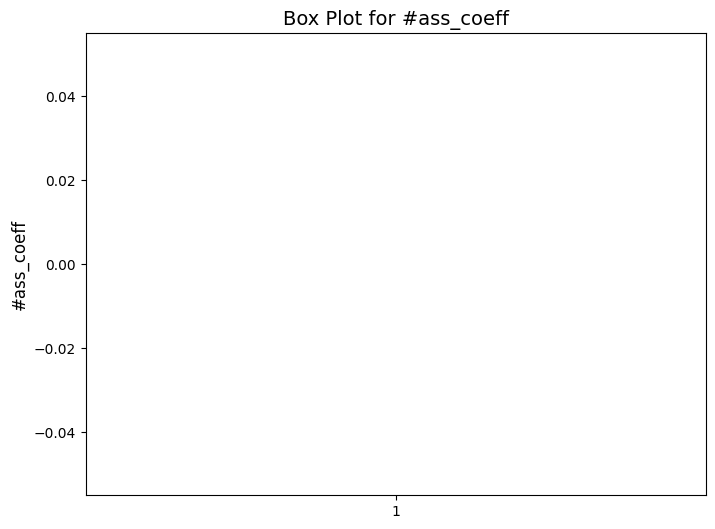

In [19]:
# Finding outliers

# Dados
n = 5000
dim, alpha_a, alpha_g = 1, 3.0, 2.0
path_file = f"../../data_2/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
# Criar um DataFrame
df = pd.read_csv(path_file, sep=' ')

# Coluna que estamos analisando
column = "#ass_coeff"

# Calcular Q1, Q3 e IQR
q1 = np.percentile(df[column], 25)
q3 = np.percentile(df[column], 75)
iqr = q3 - q1

# Limites para outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identificar outliers
outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

df_wo_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Exibir outliers
print("Outliers encontrados:")
print(outliers)

# Plotar o box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df[column], vert=True, patch_artist=True, showmeans=True)
plt.title(f"Box Plot for {column}", fontsize=14)
plt.ylabel(column, fontsize=12)
plt.show()

In [20]:
def all_properties_file2(N, dim, alpha_a, alpha_g):
    # Diretório onde os arquivos estão localizados
    path_d = f"../../data_2/N_{N}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/prop"
    path_save = f"../../data_2/N_{N}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}"
    print(f"N = {N}, dim = {dim}, alpha_a = {alpha_a}, alpha_g = {alpha_g}")
    
    # Arquivos a serem atualizados
    properties_file = os.path.join(path_save, "properties_set.txt")
    filenames_file = os.path.join(path_save, "filenames.txt")
    
    # Verificar se o diretório 'prop' existe
    if not os.path.exists(path_d):
        print(f"O diretório {path_d} não existe. Nada a ser feito.")
        return
    
    # Obter todos os arquivos CSV na pasta prop
    all_files = glob.glob(os.path.join(path_d, "*.csv"))
    
    # Se não houver arquivos na pasta prop, nada é feito
    if not all_files:
        print(f"A pasta {path_d} está vazia. Nada a ser feito.")
        return
    
    # Checar se o arquivo filenames.txt existe, caso contrário criar um
    if os.path.exists(filenames_file):
        with open(filenames_file, 'r') as f:
            filenames_set = set(f.read().splitlines())  # Ler todos os arquivos já processados
    else:
        filenames_set = set()
    
    # Se o arquivo properties_set.txt existir, carregar o dataframe, caso contrário criar um novo
    if os.path.exists(properties_file):
        df = pd.read_csv(properties_file, sep=',')
    else:
        df = pd.DataFrame(columns=["#short_path", "#diamater", "#ass_coeff"])
    
    # Variável para rastrear se houve atualizações
    updated = False
    new_rows = []  # Armazenar novas linhas para adicionar ao dataframe
    
    # Iterar sobre todos os arquivos CSV e verificar se já foram processados
    for file in all_files:
        filename = os.path.basename(file)
        
        # Se o arquivo já foi processado, ignorar
        if filename in filenames_set:
            continue
        
        # Se o arquivo ainda não foi processado, ler os dados e adicionar ao DataFrame
        new_data = pd.read_csv(file)
        new_row = {
            "#short_path": new_data["#mean shortest path"].values[0],
            "#diamater": new_data["# diamater"].values[0],
            "#ass_coeff": new_data["#assortativity coefficient"].values[0]
        }
        new_rows.append(new_row)
        
        # Adicionar o nome do arquivo ao conjunto de arquivos processados
        filenames_set.add(filename)
        updated = True  # Indicar que houve atualizações
        #os.remove(file)  # Opcional: remover o arquivo após processamento
    
    # Se houver atualizações, salvar os arquivos atualizados
    if updated:
        # Adicionar as novas linhas ao dataframe
        df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)
        
        # Salvar o dataframe atualizado
        df.to_csv(properties_file, sep=' ', index=False)
        
        # Atualizar o arquivo filenames.txt
        with open(filenames_file, 'w') as f:
            f.write("\n".join(sorted(filenames_set)))  # Escrever os nomes dos arquivos processados
        
        print(f"Arquivos {properties_file} e {filenames_file} atualizados com sucesso.")
    else:
        print("Nenhuma atualização necessária. Todos os arquivos já estavam processados.")

In [21]:
df_5 = filtered_df[filtered_df["N"]==5000]
df_10 = filtered_df[filtered_df["N"]==10000]
df_20 = filtered_df[filtered_df["N"]==20000]
df_40 = filtered_df[filtered_df["N"]==40000]
df_80 = filtered_df[filtered_df["N"]==80000]
df_160 = filtered_df[filtered_df["N"]==160000]
df_320 = filtered_df[filtered_df["N"]==320000]
#N = 10000,  n_s 3200
#N = 20000,  n_s 700
#N = 40000,  n_s 500
#N = 80000,  n_s 200
#N = 160000, n_s 30
#N = 320000, n_s 15

In [22]:
N, dim, alpha_a, alpha_g = 5000, 4, 13.0, 2.0
all_properties_file2(N, dim, alpha_a, alpha_g)
df = pd.read_csv(f"../../data_2/N_5000/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt", sep=' ')
(df["#ass_coeff"].sem()/abs(df["#ass_coeff"].mean()))*100

N = 5000, dim = 4, alpha_a = 13.0, alpha_g = 2.0
Nenhuma atualização necessária. Todos os arquivos já estavam processados.


np.float64(60.967559231821575)

In [23]:
for _, row in df_5.iterrows():
    row["N"]
    all_properties_file2(5000, int(row["dim"]), row["alpha_a"], row["alpha_g"])

N = 5000, dim = 1, alpha_a = 3.0, alpha_g = 2.0
Nenhuma atualização necessária. Todos os arquivos já estavam processados.
N = 5000, dim = 2, alpha_a = 7.0, alpha_g = 2.0
Nenhuma atualização necessária. Todos os arquivos já estavam processados.
N = 5000, dim = 2, alpha_a = 8.0, alpha_g = 2.0
Nenhuma atualização necessária. Todos os arquivos já estavam processados.
N = 5000, dim = 2, alpha_a = 10.0, alpha_g = 2.0
Nenhuma atualização necessária. Todos os arquivos já estavam processados.
N = 5000, dim = 3, alpha_a = 10.0, alpha_g = 2.0
Arquivos ../../data_2/N_5000/dim_3/alpha_a_10.0_alpha_g_2.0/properties_set.txt e ../../data_2/N_5000/dim_3/alpha_a_10.0_alpha_g_2.0/filenames.txt atualizados com sucesso.
N = 5000, dim = 4, alpha_a = 10.0, alpha_g = 2.0
Arquivos ../../data_2/N_5000/dim_4/alpha_a_10.0_alpha_g_2.0/properties_set.txt e ../../data_2/N_5000/dim_4/alpha_a_10.0_alpha_g_2.0/filenames.txt atualizados com sucesso.
N = 5000, dim = 4, alpha_a = 12.0, alpha_g = 2.0
Arquivos ../../data_2/

In [24]:
for _, row in df_5.iterrows():
    dim = int(row["dim"])
    alpha_a, alpha_g = row["alpha_a"], row["alpha_g"]
    path_file = f"../../data_2/N_5000/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
    df = pd.read_csv(path_file, sep=' ')
    R = df["#ass_coeff"]
    R_per = (R.sem()/abs(R.mean()))*100
    print(f"alpha_a = {alpha_a}, alpha_g = {alpha_g}, dim = {dim}, err = {R_per}")

alpha_a = 3.0, alpha_g = 2.0, dim = 1, err = 9.320414397783992
alpha_a = 7.0, alpha_g = 2.0, dim = 2, err = 2.9438863688573607
alpha_a = 8.0, alpha_g = 2.0, dim = 2, err = 4.495565492150178
alpha_a = 10.0, alpha_g = 2.0, dim = 2, err = 0.9611159020257698
alpha_a = 10.0, alpha_g = 2.0, dim = 3, err = 85.75624821604725
alpha_a = 10.0, alpha_g = 2.0, dim = 4, err = 76.39046715766152
alpha_a = 12.0, alpha_g = 2.0, dim = 4, err = 113.67534654826328
alpha_a = 12.0, alpha_g = 2.0, dim = 3, err = 135.05844853941974
alpha_a = 13.0, alpha_g = 2.0, dim = 4, err = 60.967559231821575
alpha_a = 14.0, alpha_g = 2.0, dim = 4, err = 4.013172952080792
alpha_a = 14.0, alpha_g = 2.0, dim = 3, err = 2.4706834496739933
alpha_a = 15.0, alpha_g = 2.0, dim = 3, err = 1.7643723446584505
alpha_a = 15.0, alpha_g = 2.0, dim = 4, err = 2.1692431164285466


In [25]:
n = 40000
dim, alpha_a, alpha_g = 4, 10.0, 2.0
all_properties_file2(n, dim, alpha_a, alpha_g)

N = 40000, dim = 4, alpha_a = 10.0, alpha_g = 2.0
Nenhuma atualização necessária. Todos os arquivos já estavam processados.


R_size: 877
R_in_size: 347
R_out_size: 158
R_ratio: 2.1962025316455698
R_err: 24.240535207146124
R_mean_before: -0.0012566438738613862
R_mean_after: -0.0012575579720461095
R_err_after: 15.06204173419459


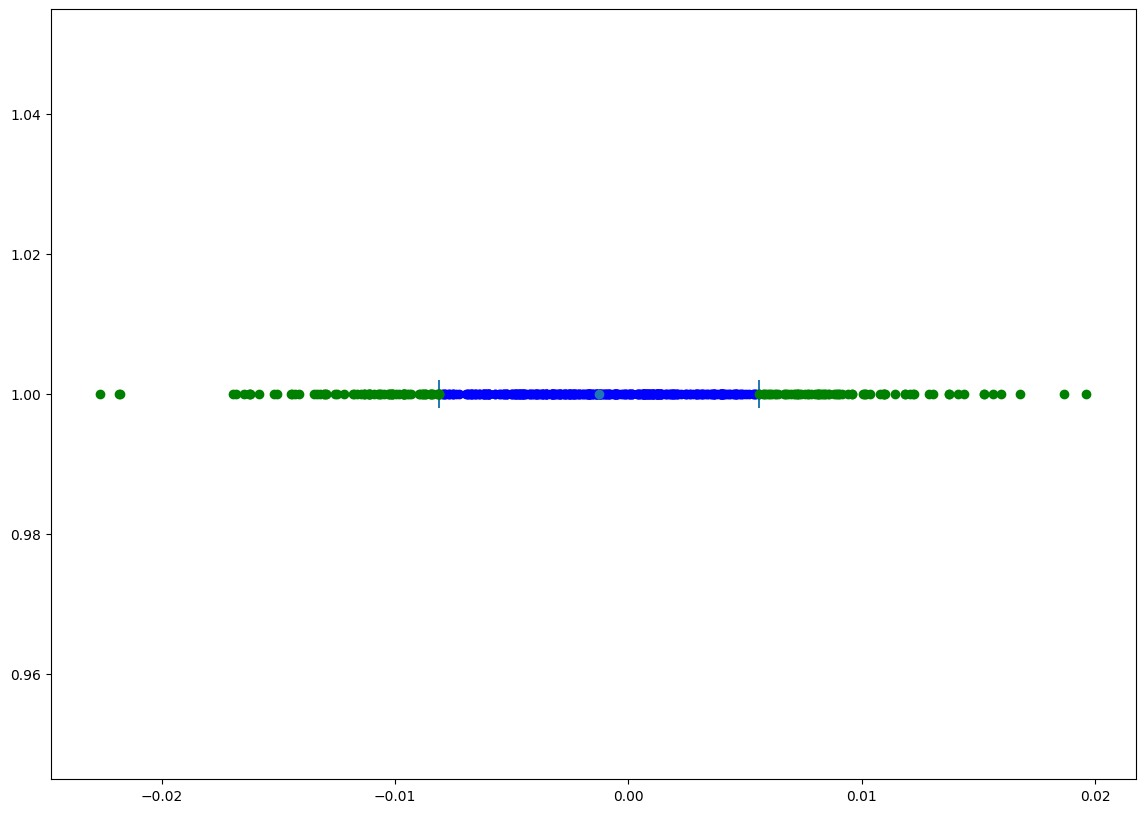

In [27]:


path_file = f"../../data_2/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
# Criar um DataFrame
df = pd.read_csv(path_file, sep=' ')
R = df["#ass_coeff"]
r_mean, r_std, r_err = R.mean(), R.std(), R.sem()
fig, ax = plt.subplots(figsize=(14, 10))

ax.errorbar(r_mean,1,xerr=r_std,marker='o',lw=1.4, capsize=10, capthick=1.4)
R_in = [i for i in R if abs(i-r_mean) <= r_std]
R_out = [i for i in R if abs(i-r_mean) > r_std]

ax.plot(R_in,np.ones(len(R_in)),'o', color='blue')
ax.plot(R_out,np.ones(len(R_out)),'o', color='green')
#ax.plot(R,np.ones(len(R)),'o')
#ax.set_xlim([r_mean - r_err, r_mean + r_err])

std_in = np.std(np.array(R_in), ddof=1)

R_in_err = std_in / np.sqrt(len(R_in))

print("R_size:",len(R))
print("R_in_size:",len(R_in))
print("R_out_size:",len(R_out))
print("R_ratio:",len(R_in)/len(R_out))
print("R_err:", (r_err/abs(r_mean))*100)
print("R_mean_before:", r_mean)
print("R_mean_after:", np.mean(np.array(R_in)))
print("R_err_after:", (R_in_err) / abs(np.mean(R_in))*100 )
plt.show()

                     #short_path  #diamater  #ass_coeff  \
0                        11.7527       28.0    0.019129   
1                         13.439       30.0    0.004168   
2                        12.3138       30.0    0.013303   
3                        16.2477       41.0   -0.024053   
4                         12.481       29.0    0.020091   
...                          ...        ...         ...   
29590   ,14.5407,35.0,-0.0155442        NaN         NaN   
29591   ,12.2339,29.0,-0.0110735        NaN         NaN   
29592   ,14.9835,40.0,-0.0117622        NaN         NaN   
29593    ,13.7618,30.0,0.0119777        NaN         NaN   
29594  ,13.0088,29.0,-0.00262269        NaN         NaN   

      #cod_file,#short_path,#diamater,#ass_coeff  
0                                            ,,,  
1                                            ,,,  
2                                            ,,,  
3                                            ,,,  
4                                   

/tmp/ipykernel_5038/3122258786.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True)


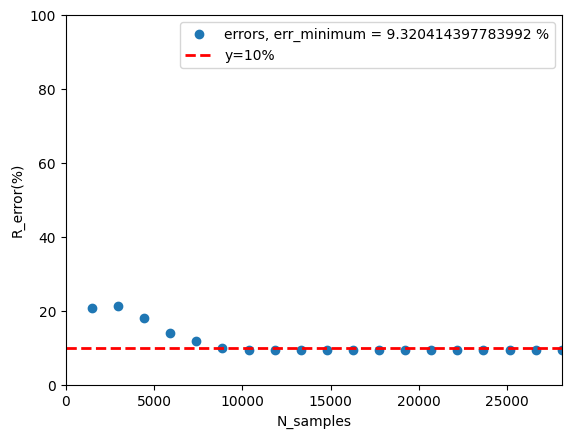

In [28]:
n, dim, alpha_a, alpha_g = 5000, 1, 3.0, 2.0
file_path = f"../../data_2/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
# Criar um DataFrame
#df = pd.read_csv(path_file, sep=' ')
df = pd.read_csv(file_path, delim_whitespace=True)
R = df["#ass_coeff"]
print(df)
num_samples = float(len(R))
num_points = 20
divisions = int(num_samples // num_points)
width = [(0,i*divisions) for i in range(1,num_points)]

R_err = []
R_mean = []
R_std = []
n_samples = []
C_V = []

for i in range(len(width)):
    R_err.append(R[0:width[i][1]].sem())
    R_mean.append(R[0:width[i][1]].mean())
    
    r_std = abs(R[0:width[i][1]].std())
    r_mean = abs(R[0:width[i][1]].mean())
    R_std.append(r_std)
    #print(r_std, r_mean)
    #C_V.append((/)*100)
    n_samples.append(len(R[0:width[i][1]]))

#print(R_std)
#print(R_mean)
#print(R_err)
print("N_samples:", len(R))
print(f"R_err = {abs(R.sem()/R.mean())*100} %" )
percent = [abs(i/j)*100 for i,j in zip(R_err, R_mean)]
#print([i/j for i,j in zip(R_err, R_mean)])
#plt.plot(n_samples, R_err,'o', label='errors')
plt.plot(n_samples, percent,'o', label=f'errors, err_minimum = {min(percent)} %')
plt.axhline(y=10, color='red', linestyle='--', linewidth=2, label="y=10%")  # Linha horizontal
#plt.plot(n_samples, R_mean,'o', label='means')
#plt.plot(n_samples, C_V,'o', label='means')
#plt.axhline(y=np.mean(np.array(C_V)), xmin=min(n_samples),xmax=max(n_samples))
plt.ylabel("R_error(%)")
plt.xlabel("N_samples")
plt.ylim([0, 100])
plt.xlim([0, width[-1][1]])
plt.legend()
#plt.xscale("log")
#plt.savefig("CV_n_samples.pdf")
plt.show()

In [29]:
N, dim, alpha_a, alpha_g = 5000, 3, 12.0, 2.0
all_properties_file2(N, dim, alpha_a, alpha_g)

N = 5000, dim = 3, alpha_a = 12.0, alpha_g = 2.0
Nenhuma atualização necessária. Todos os arquivos já estavam processados.


      #short_path #diamater #ass_coeff  #short_path  #diamater  #ass_coeff
0                14.2055 33 -0.0503933          NaN        NaN         NaN
1                 12.0129 30 0.0115578          NaN        NaN         NaN
2               12.4106 29 0.000927761          NaN        NaN         NaN
3                  11.231 26 0.0140985          NaN        NaN         NaN
4                 11.964 28 -0.0335058          NaN        NaN         NaN
...                                ...          ...        ...         ...
20140            12.6832 28 0.00306724          NaN        NaN         NaN
20141                              NaN      11.8198       29.0   -0.000936
20142                              NaN      11.8521       29.0    0.007454
20143                              NaN      12.1827       29.0   -0.022535
20144                              NaN      13.0849       36.0   -0.036582

[20145 rows x 4 columns]
N_samples: 20145
R_err = 76.39046715766152 %


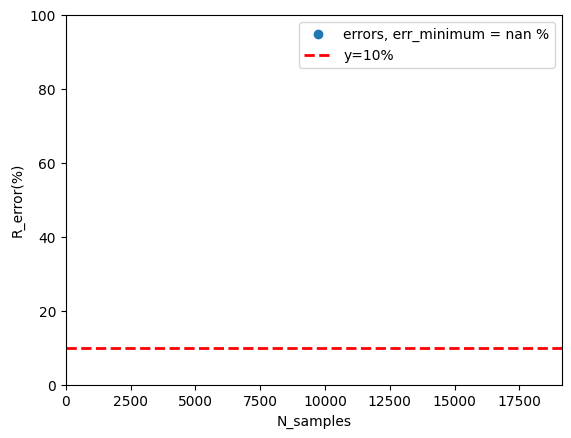

In [ ]:

dim, alpha_a, alpha_g = 4, 10.0, 2.0
file_path = f"../../data_2/N_{N}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
# Criar um DataFrame
#df = pd.read_csv(path_file, sep=' ')
df = pd.read_csv(file_path, sep = ' ')
df
R = df["#ass_coeff"]
print(df)
num_samples = float(len(R))
num_points = 20
divisions = int(num_samples // num_points)
width = [(0,i*divisions) for i in range(1,num_points)]

R_err = []
R_mean = []
R_std = []
n_samples = []
C_V = []

for i in range(len(width)):
    R_err.append(R[0:width[i][1]].sem())
    R_mean.append(R[0:width[i][1]].mean())
    
    r_std = abs(R[0:width[i][1]].std())
    r_mean = abs(R[0:width[i][1]].mean())
    R_std.append(r_std)
    #print(r_std, r_mean)
    #C_V.append((/)*100)
    n_samples.append(len(R[0:width[i][1]]))

#print(R_std)
#print(R_mean)
#print(R_err)
print("N_samples:", len(R))
print(f"R_err = {abs(R.sem()/R.mean())*100} %" )
percent = [abs(i/j)*100 for i,j in zip(R_err, R_mean)]
#print([i/j for i,j in zip(R_err, R_mean)])
#plt.plot(n_samples, R_err,'o', label='errors')
plt.plot(n_samples, percent,'o', label=f'errors, err_minimum = {min(percent)} %')
plt.axhline(y=10, color='red', linestyle='--', linewidth=2, label="y=10%")  # Linha horizontal
#plt.plot(n_samples, R_mean,'o', label='means')
#plt.plot(n_samples, C_V,'o', label='means')
#plt.axhline(y=np.mean(np.array(C_V)), xmin=min(n_samples),xmax=max(n_samples))
plt.ylabel("R_error(%)")
plt.xlabel("N_samples")
plt.ylim([0, 100])
plt.xlim([0, width[-1][1]])
plt.legend()
#plt.xscale("log")
#plt.savefig("CV_n_samples.pdf")
plt.show()

N_samples: 877
R_err = nan %


/tmp/ipykernel_5038/3323762311.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True)


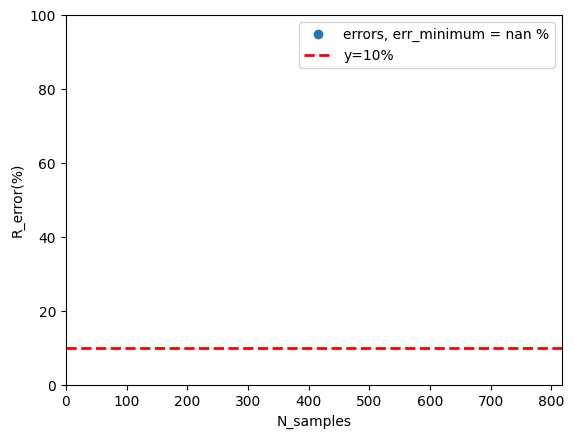

In [31]:
n, dim, alpha_a, alpha_g = 40000, 4, 10.0, 2.0
file_path = f"../../data_2/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
# Criar um DataFrame
#df = pd.read_csv(path_file, sep=' ')
df = pd.read_csv(file_path, delim_whitespace=True)
R = df["#ass_coeff"]

num_samples = float(len(R))
num_points = 20
divisions = int(num_samples // num_points)
width = [(0,i*divisions) for i in range(1,num_points)]

R_err = []
R_mean = []
R_std = []
n_samples = []
C_V = []

for i in range(len(width)):
    R_err.append(R[0:width[i][1]].sem())
    R_mean.append(R[0:width[i][1]].mean())
    
    r_std = abs(R[0:width[i][1]].std())
    r_mean = abs(R[0:width[i][1]].mean())
    R_std.append(r_std)
    #print(r_std, r_mean)
    #C_V.append((/)*100)
    n_samples.append(len(R[0:width[i][1]]))

#print(R_std)
#print(R_mean)
#print(R_err)
print("N_samples:", len(R))
print(f"R_err = {abs(R.sem()/R.mean())*100} %" )
percent = [abs(i/j)*100 for i,j in zip(R_err, R_mean)]
#print([i/j for i,j in zip(R_err, R_mean)])
#plt.plot(n_samples, R_err,'o', label='errors')
plt.plot(n_samples, percent,'o', label=f'errors, err_minimum = {min(percent)} %')
plt.axhline(y=10, color='red', linestyle='--', linewidth=2, label="y=10%")  # Linha horizontal
#plt.plot(n_samples, R_mean,'o', label='means')
#plt.plot(n_samples, C_V,'o', label='means')
#plt.axhline(y=np.mean(np.array(C_V)), xmin=min(n_samples),xmax=max(n_samples))
plt.ylabel("R_error(%)")
plt.xlabel("N_samples")
plt.ylim([0, 100])
plt.xlim([0, width[-1][1]])
plt.legend()
#plt.xscale("log")
#plt.savefig("CV_n_samples.pdf")
plt.show()

In [32]:
filtered_df[filtered_df["N"]==10000].reset_index(drop=True)



,N,dim,alpha_a,alpha_g,N_samples,per_short,std_short,per_ass,std_ass,per_dia,std_dia
0,10000.0,4.0,10.0,2.0,51.0,0.557231,0.530440,24.998502,0.012113,0.711656,1.624325
1,10000.0,3.0,10.0,2.0,51.0,0.547655,0.557577,71.868793,0.010315,0.970874,2.380476
2,10000.0,3.0,11.0,2.0,2287.0,0.101177,0.699022,12.052079,0.010975,0.146924,2.428415
3,10000.0,3.0,12.0,2.0,51.0,0.612416,0.639043,33.761237,0.011159,0.969379,2.398529
4,10000.0,4.0,12.0,2.0,51.0,0.915458,0.912626,509.746922,0.011045,1.170676,2.812995
5,10000.0,3.0,14.0,2.0,51.0,0.777799,0.825723,23.670235,0.013675,1.172566,2.968594
6,10000.0,4.0,14.0,2.0,51.0,0.702636,0.708174,22.767787,0.009675,0.968682,2.333053
7,10000.0,4.0,15.0,2.0,51.0,0.652443,0.654341,29.312199,0.013299,0.955789,2.319398
8,10000.0,3.0,15.0,2.0,51.0,0.604741,0.647900,19.773953,0.012639,1.057979,2.648862


       #short_path  #diamater  #ass_coeff
0          14.1308         30    0.003659
1          13.6079         34   -0.004645
2          13.1941         31    0.003141
3          13.3144         33   -0.010219
4          13.6317         32   -0.013444
...            ...        ...         ...
40806      12.7525         29   -0.014356
40807      13.1718         33    0.014559
40808      13.1680         31   -0.027495
40809      13.1880         33   -0.004659
40810      12.8113         30    0.024594

[40811 rows x 3 columns]
N_samples: 40811
R_err = 135.05844853941974 %


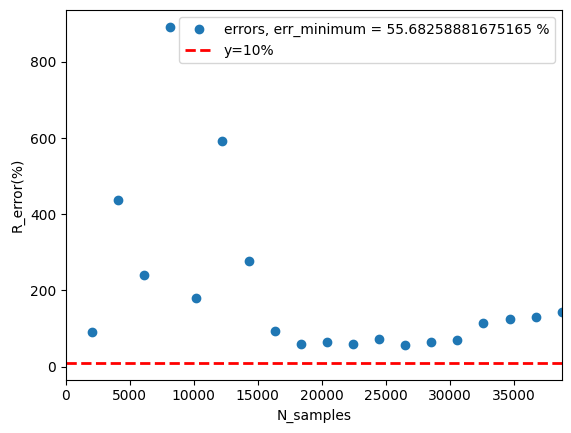

In [33]:
n, dim, alpha_a, alpha_g = 5000, 3, 12.0, 2.0
file_path = f"../../data_2/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
# Criar um DataFrame
#df = pd.read_csv(path_file, sep=' ')
df = pd.read_csv(file_path, sep=' ')
R = df["#ass_coeff"]
print(df)
num_samples = float(len(R))
num_points = 20
divisions = int(num_samples // num_points)
width = [(0,i*divisions) for i in range(1,num_points)]

R_err = []
R_mean = []
R_std = []
n_samples = []
C_V = []

for i in range(len(width)):
    R_err.append(R[0:width[i][1]].sem())
    R_mean.append(R[0:width[i][1]].mean())
    
    r_std = abs(R[0:width[i][1]].std())
    r_mean = abs(R[0:width[i][1]].mean())
    R_std.append(r_std)
    #print(r_std, r_mean)
    #C_V.append((/)*100)
    n_samples.append(len(R[0:width[i][1]]))

#print(R_std)
#print(R_mean)
#print(R_err)
print("N_samples:", len(R))
print(f"R_err = {abs(R.sem()/R.mean())*100} %" )
percent = [abs(i/j)*100 for i,j in zip(R_err, R_mean)]
#print([i/j for i,j in zip(R_err, R_mean)])
#plt.plot(n_samples, R_err,'o', label='errors')
plt.plot(n_samples, percent,'o', label=f'errors, err_minimum = {min(percent)} %')
plt.axhline(y=10, color='red', linestyle='--', linewidth=2, label="y=10%")  # Linha horizontal
#plt.plot(n_samples, R_mean,'o', label='means')
#plt.plot(n_samples, C_V,'o', label='means')
#plt.axhline(y=np.mean(np.array(C_V)), xmin=min(n_samples),xmax=max(n_samples))
plt.ylabel("R_error(%)")
plt.xlabel("N_samples")
#plt.ylim([0, 100])
plt.xlim([0, width[-1][1]])
plt.legend()
#plt.xscale("log")
#plt.savefig("CV_n_samples.pdf"')
plt.show()

R_size: 51
σ: 0.011195653034690932
R_mean: 0.04047569607843137
R_in_size: 37
R_out_size: 14
R_ratio: 2.642857142857143
R_err: 3.873200831873877
R_mean_in: 0.040850889189189186
R_err_int: 2.6184743850147605


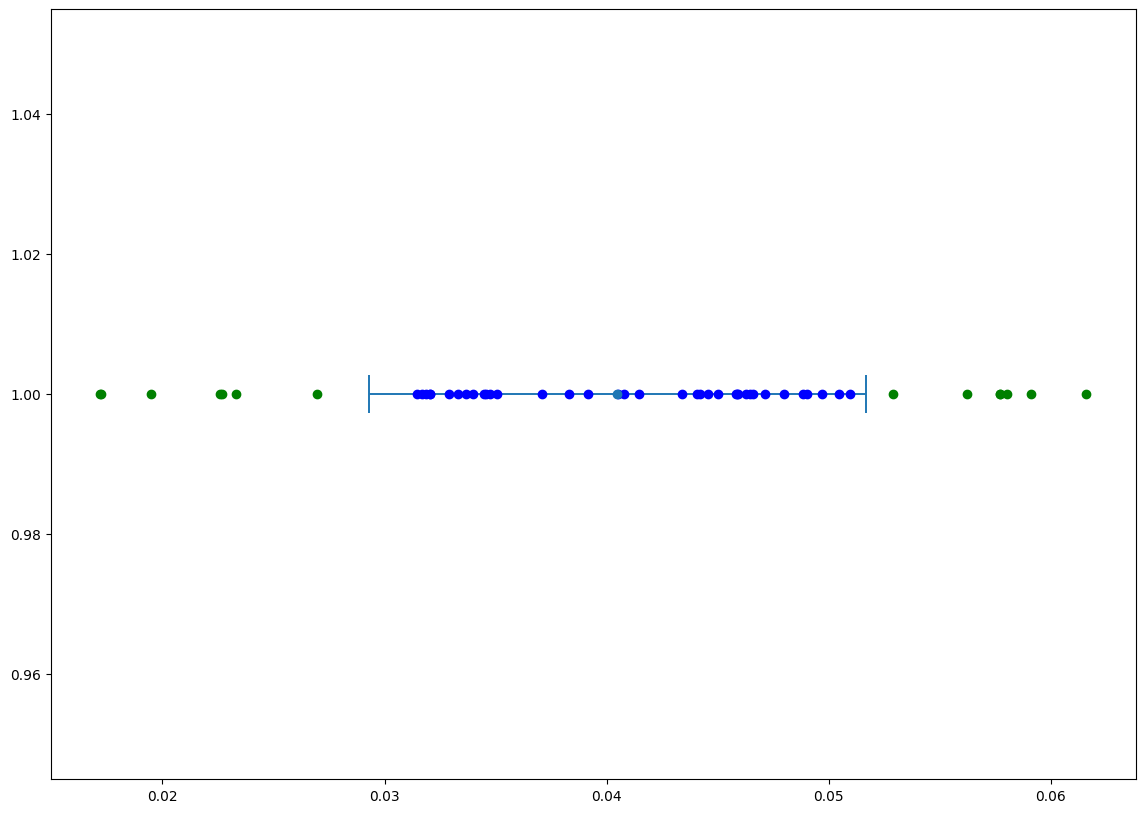

In [34]:
n = 5000
dim, alpha_a, alpha_g = 1, 8.0, 3.0
path_file = f"../../data/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
# Criar um DataFrame
df = pd.read_csv(path_file, sep=',')
R = df["#ass_coeff"]

r_mean, r_std, r_err = R.mean(), R.std(), R.sem()
fig, ax = plt.subplots(figsize=(14, 10))

ax.errorbar(r_mean,1,xerr=r_std,marker='o',lw=1.4, capsize=14 ,capthick=1.4)

R_in = [i for i in R if abs(i-r_mean) <= r_std]
R_out = [i for i in R if abs(i-r_mean) > r_std]

ax.plot(R_in,np.ones(len(R_in)),'o', color='blue')
ax.plot(R_out,np.ones(len(R_out)),'o', color='green')

std_in = np.std(np.array(R_in), ddof=1)

R_in_err = std_in / np.sqrt(len(R_in))

print("R_size:",len(R))
print("σ:", r_std)
print("R_mean:", r_mean)
print("R_in_size:",len(R_in))
print("R_out_size:",len(R_out))
print("R_ratio:",len(R_in)/len(R_out))
print("R_err:", (r_err/abs(r_mean))*100)
print("R_mean_in:", np.mean(np.array(R_in)))

print("R_err_int:", (R_in_err) / abs(np.mean(R_in))*100 )
#ax.set_xlim([r_mean - r_err, r_mean + r_err])
plt.show()

In [35]:
filtered_df

,N,dim,alpha_a,alpha_g,N_samples,per_short,std_short,per_ass,std_ass,per_dia,std_dia
0,320000.0,4.0,0.0,2.0,7.0,1.090394,0.368028,10.231336,0.004835,0.816340,0.786796
1,320000.0,3.0,1.0,2.0,7.0,1.500937,0.486508,17.693658,0.010579,2.294106,2.115701
2,160000.0,4.0,1.0,2.0,12.0,1.872601,0.751579,11.744720,0.010087,1.443839,1.621354
3,320000.0,4.0,3.0,2.0,7.0,2.821308,0.918413,16.063719,0.013894,3.125044,2.870208
4,5000.0,1.0,3.0,2.0,1153.0,0.213912,0.984802,23.727713,0.013232,0.308754,3.442902
...,...,...,...,...,...,...,...,...,...,...,...
69,10000.0,4.0,14.0,2.0,51.0,0.702636,0.708174,22.767787,0.009675,0.968682,2.333053
70,10000.0,4.0,15.0,2.0,51.0,0.652443,0.654341,29.312199,0.013299,0.955789,2.319398
71,10000.0,3.0,15.0,2.0,51.0,0.604741,0.647900,19.773953,0.012639,1.057979,2.648862
72,5000.0,3.0,15.0,2.0,101.0,0.581701,0.792137,17.939215,0.013582,0.832939,2.689473


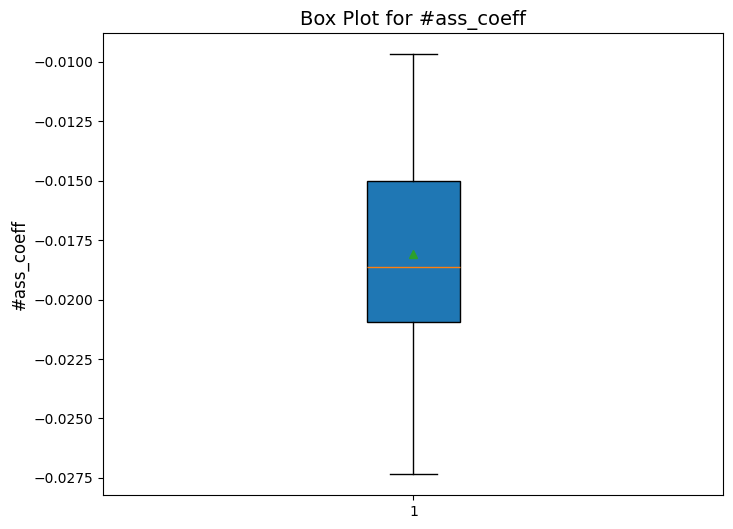

In [36]:
# box_plot
n=320000
dim = 1
alpha_a, alpha_g = 0.0, 2.0
path_file = f"../../data/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
a = pd.read_csv(path_file, sep=',')

plt.figure(figsize=(8, 6))
plt.boxplot(a["#ass_coeff"], vert=True, patch_artist=True, showmeans=True)
plt.title("Box Plot for #ass_coeff", fontsize=14)
plt.ylabel("#ass_coeff", fontsize=12)
plt.show()

In [37]:
N_f = [5000, 10000, 20000, 40000]

for _, row in filtered_df.iterrows():
    N, dim, alpha_a, alpha_g = int(row["N"]), int(row["dim"]), float(row["alpha_a"]), float(row["alpha_g"])
    if N not in N_f:
        pass
    else:
        #all_properties_file2(N, dim, alpha_a, alpha_g)
        df = pd.read_csv(f"../../data_2/N_{N}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt", sep=' ')
        R = df["#ass_coeff"]
        R_err = abs(R.sem()/R.mean())*100
        if(R_err >= 10):
            print(f"Err:{R_err}, N:{N}, dim:{dim} ,alpha_a: {alpha_a}, alpha_g:{alpha_g}")

Err:19.901372801486453, N:20000, dim:2 ,alpha_a: 6.0, alpha_g:2.0
Err:11.459549527562384, N:40000, dim:3 ,alpha_a: 8.0, alpha_g:2.0
Err:31.702165029721414, N:20000, dim:3 ,alpha_a: 9.0, alpha_g:2.0
Err:13.488993280405435, N:40000, dim:3 ,alpha_a: 9.0, alpha_g:2.0
Err:12.786413774670649, N:20000, dim:4 ,alpha_a: 10.0, alpha_g:2.0
Err:10.54882044412851, N:20000, dim:3 ,alpha_a: 10.0, alpha_g:2.0
Err:85.75624821604725, N:5000, dim:3 ,alpha_a: 10.0, alpha_g:2.0
Err:27.246618281219128, N:10000, dim:3 ,alpha_a: 10.0, alpha_g:2.0
Err:24.240535207146124, N:40000, dim:4 ,alpha_a: 10.0, alpha_g:2.0
Err:76.39046715766152, N:5000, dim:4 ,alpha_a: 10.0, alpha_g:2.0
Err:15.546452273100789, N:40000, dim:4 ,alpha_a: 11.0, alpha_g:2.0
Err:49.10269250874414, N:20000, dim:4 ,alpha_a: 11.0, alpha_g:2.0
Err:12.36372914854592, N:20000, dim:4 ,alpha_a: 12.0, alpha_g:2.0
Err:113.67534654826328, N:5000, dim:4 ,alpha_a: 12.0, alpha_g:2.0
Err:135.05844853941974, N:5000, dim:3 ,alpha_a: 12.0, alpha_g:2.0
Err:21.7

In [41]:
filtered_df[filtered_df["N"]==320000]

,N,dim,alpha_a,alpha_g,N_samples,per_short,std_short,per_ass,std_ass,per_dia,std_dia
0,320000.0,4.0,0.0,2.0,7.0,1.090394,0.368028,10.231336,0.004835,0.816340,0.786796
1,320000.0,3.0,1.0,2.0,7.0,1.500937,0.486508,17.693658,0.010579,2.294106,2.115701
3,320000.0,4.0,3.0,2.0,7.0,2.821308,0.918413,16.063719,0.013894,3.125044,2.870208
7,320000.0,2.0,5.0,2.0,7.0,1.009802,0.533346,19.768038,0.002123,1.245705,1.676163
11,320000.0,3.0,6.0,2.0,7.0,2.266597,1.107668,15.536231,0.004087,1.598755,1.951800
13,320000.0,3.0,7.0,2.0,24.0,0.728681,0.685694,29.421829,0.002838,0.929982,2.145099
17,320000.0,3.0,8.0,2.0,24.0,0.605613,0.584853,27.449370,0.002738,1.119827,2.697288
22,320000.0,4.0,8.0,2.0,9.0,1.634044,0.887598,16.226056,0.003210,2.618745,3.640055
24,320000.0,4.0,9.0,2.0,23.0,0.740318,0.660922,16.529770,0.003231,1.052438,2.359071
27,320000.0,3.0,9.0,2.0,7.0,1.613732,0.852971,13.506019,0.002620,2.766193,3.638419


In [38]:
N = 20000
dim = [2, 3, 4, 3, 4, 4]
alpha_a = [6.0, 9.0, 10.0, 10.0, 11.0, 12.0]
alpha_g = 2.0

     #short_path  #diamater  #ass_coeff
0        15.9340         39   -0.003165
1        16.4427         41   -0.002603
2        16.0665         40   -0.000693
3        16.0711         40    0.003224
4        16.6337         41    0.004401
..           ...        ...         ...
500      16.5684         40   -0.008664
501      16.1779         40    0.000608
502      16.3075         40    0.005417
503      16.2347         39   -0.011448
504      16.1637         40   -0.005305

[505 rows x 3 columns]
N_samples: 505
R_err = 11.459549527562384 %


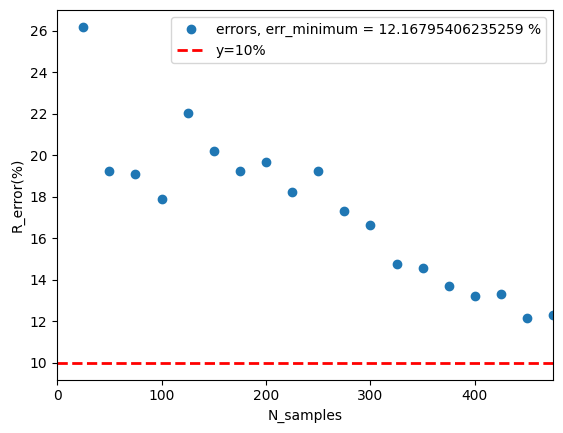

In [39]:
n, dim, alpha_a, alpha_g = 40000, 3, 8.0, 2.0
file_path = f"../../data_2/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
# Criar um DataFrame
#df = pd.read_csv(path_file, sep=' ')
df = pd.read_csv(file_path, sep=' ')
R = df["#ass_coeff"]
print(df)
num_samples = float(len(R))
num_points = 20
divisions = int(num_samples // num_points)
width = [(0,i*divisions) for i in range(1,num_points)]

R_err = []
R_mean = []
R_std = []
n_samples = []
C_V = []

for i in range(len(width)):
    R_err.append(R[0:width[i][1]].sem())
    R_mean.append(R[0:width[i][1]].mean())
    
    r_std = abs(R[0:width[i][1]].std())
    r_mean = abs(R[0:width[i][1]].mean())
    R_std.append(r_std)
    #print(r_std, r_mean)
    #C_V.append((/)*100)
    n_samples.append(len(R[0:width[i][1]]))

#print(R_std)
#print(R_mean)
#print(R_err)
print("N_samples:", len(R))
print(f"R_err = {abs(R.sem()/R.mean())*100} %" )
percent = [abs(i/j)*100 for i,j in zip(R_err, R_mean)]
#print([i/j for i,j in zip(R_err, R_mean)])
#plt.plot(n_samples, R_err,'o', label='errors')
plt.plot(n_samples, percent,'o', label=f'errors, err_minimum = {min(percent)} %')
plt.axhline(y=10, color='red', linestyle='--', linewidth=2, label="y=10%")  # Linha horizontal
#plt.plot(n_samples, R_mean,'o', label='means')
#plt.plot(n_samples, C_V,'o', label='means')
#plt.axhline(y=np.mean(np.array(C_V)), xmin=min(n_samples),xmax=max(n_samples))
plt.ylabel("R_error(%)")
plt.xlabel("N_samples")
#plt.ylim([0, 100])
plt.xlim([0, width[-1][1]])
plt.legend()
#plt.xscale("log")
#plt.savefig("CV_n_samples.pdf"')
plt.show()